<a href="https://colab.research.google.com/github/juanjohn/globalisation_indian_context/blob/master/McKinsey_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
!wget http://www.wiod.org/protected3/data16/wiot_ROW/wiot_stata_Nov16.zip
!unzip wiot_stata_Nov16.zip -d './data'
!ls ./data

--2020-01-12 05:03:11--  http://www.wiod.org/protected3/data16/wiot_ROW/wiot_stata_Nov16.zip
Resolving www.wiod.org (www.wiod.org)... 129.125.14.26
Connecting to www.wiod.org (www.wiod.org)|129.125.14.26|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 638963496 (609M) [application/zip]
Saving to: ‘wiot_stata_Nov16.zip.1’

wiot_stata_Nov16.zi 100%[===================>] 609.36M   148MB/s    in 3.8s    

2020-01-12 05:03:15 (161 MB/s) - ‘wiot_stata_Nov16.zip.1’ saved [638963496/638963496]

Archive:  wiot_stata_Nov16.zip
replace ./data/WIOT2000_October16_ROW.dta? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./data/WIOT2001_October16_ROW.dta? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./data/WIOT2002_October16_ROW.dta? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
WIOT2000_October16_ROW.dta  WIOT2008_October16_ROW.dta
WIOT2001_October16_ROW.dta  WIOT2009_October16_ROW.dta
WIOT2002_October16_ROW.dta  WIOT2010_October16_ROW.dta
WIOT2003_October16_ROW.dta  WIOT2011_O

In [0]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [0]:
'''The table below provides world Input-output tables (WIOT) in current prices, denoted in millions of dollars. 
The database covers 28 EU countries and 15 other major countries in the world for the period from 2000 to 2014.

E. Dietzenbacher, B. Los, R. Stehrer, M.P. Timmer and G.J. de Vries (2013), 
"The Construction of World Input-Output Tables in the WIOD Project", 
Economic Systems Research, 25, 71-98.

'''

i14 = pd.read_stata('./data/WIOT2014_October16_ROW.dta')
i13 = pd.read_stata('./data/WIOT2013_October16_ROW.dta')
i12 = pd.read_stata('./data/WIOT2012_October16_ROW.dta')
i11 = pd.read_stata('./data/WIOT2011_October16_ROW.dta')
i10 = pd.read_stata('./data/WIOT2010_October16_ROW.dta')
i9 = pd.read_stata('./data/WIOT2009_October16_ROW.dta')
i8 = pd.read_stata('./data/WIOT2008_October16_ROW.dta')
i7 = pd.read_stata('./data/WIOT2007_October16_ROW.dta')
i6 = pd.read_stata('./data/WIOT2006_October16_ROW.dta')
i5 = pd.read_stata('./data/WIOT2005_October16_ROW.dta')
i4 = pd.read_stata('./data/WIOT2004_October16_ROW.dta')
i3 = pd.read_stata('./data/WIOT2003_October16_ROW.dta')
i2 = pd.read_stata('./data/WIOT2002_October16_ROW.dta')
i1 = pd.read_stata('./data/WIOT2001_October16_ROW.dta')
i0 = pd.read_stata('./data/WIOT2000_October16_ROW.dta')


In [0]:
i0 = i0.loc[i0['Country']=='IND'].round(2)
i1 = i1.loc[i1['Country']=='IND'].round(2)
i2 = i2.loc[i2['Country']=='IND'].round(2)
i3 = i3.loc[i3['Country']=='IND'].round(2)
i4 = i4.loc[i4['Country']=='IND'].round(2)
i5 = i5.loc[i5['Country']=='IND'].round(2)
i6 = i6.loc[i6['Country']=='IND'].round(2)
i7 = i7.loc[i7['Country']=='IND'].round(2)
i8 = i8.loc[i8['Country']=='IND'].round(2)
i9 = i9.loc[i9['Country']=='IND'].round(2)
i10 = i10.loc[i10['Country']=='IND'].round(2)
i11 = i11.loc[i11['Country']=='IND'].round(2)
i12 = i12.loc[i12['Country']=='IND'].round(2)
i13 = i13.loc[i13['Country']=='IND'].round(2)
i14 = i14.loc[i14['Country']=='IND'].round(2)

In [178]:
df_m = pd.read_csv('WEO_Global_Data.csv', index_col=0)
df_m2 = df_m.loc[(df_m['Subject Descriptor'] == "Gross domestic product, current prices") & (df_m["Units"]=="U.S. dollars")] #U.S. dollars, Purchasing power parity; international dollars

df_m3 = df_m2.drop(['Subject Descriptor', 'Units', 'Scale', 'Country/Series-specific Notes', 'Estimates Start After'], axis=1)
df_m4 = df_m3.T

Country,Bangladesh,Brazil,China,Hong Kong SAR,India,Japan,Russia,United Kingdom,United States
1980,22.632,145.767,305.348,28.862,189.438,"1,105.39",NaN,604.678,"2,857.33"
1981,22.057,167.523,290.827,31.055,196.535,"1,218.99",NaN,587.772,"3,207.03"
1982,20.197,179.102,286.719,32.291,203.537,"1,134.52",NaN,558.717,"3,343.80"
1983,21.165,143.601,307.677,29.907,222.049,"1,243.32",NaN,532.564,"3,634.03"
1984,24.064,142.906,316.628,33.511,215.556,"1,318.38",NaN,504.481,"4,037.65"
1985,24.756,226.858,312.616,35.7,237.618,"1,398.89",NaN,536.81,"4,339.00"
1986,25.954,263.163,303.34,41.076,252.751,"2,078.95",NaN,654.761,"4,579.63"
1987,28.633,286.438,330.303,50.623,283.75,"2,532.81",NaN,812.013,"4,855.25"
1988,30.904,319.991,411.923,59.708,299.645,"3,071.68",NaN,988.304,"5,236.43"
1989,34.046,439.278,461.066,68.79,300.187,"3,054.91",NaN,"1,005.57","5,641.60"


In [297]:
df_m4['Year'] = df_m4.index.values
df_m4['Year'] = pd.to_datetime(df_m4.Year, format='%Y')
#df_m4 = df_m4['Brazil'].astype(float)

df_m4[df_m4.columns[0:20]] = df_m4[df_m4.columns[0:20]].replace({'\$': '', ',': ''}, regex=True)
df_m4[df_m4.columns[0:-1]] = df_m4[df_m4.columns[0:-1]].astype(float)
df_m4.head()

Country,Bangladesh,Brazil,China,Hong Kong SAR,India,Japan,Russia,United Kingdom,United States,Year
1980,22.632,145.767,305.348,28.862,189.438,1105.39,NaN,604.678,2857.33,1980-01-01
1981,22.057,167.523,290.827,31.055,196.535,1218.99,NaN,587.772,3207.03,1981-01-01
1982,20.197,179.102,286.719,32.291,203.537,1134.52,NaN,558.717,3343.80,1982-01-01
1983,21.165,143.601,307.677,29.907,222.049,1243.32,NaN,532.564,3634.03,1983-01-01
1984,24.064,142.906,316.628,33.511,215.556,1318.38,NaN,504.481,4037.65,1984-01-01


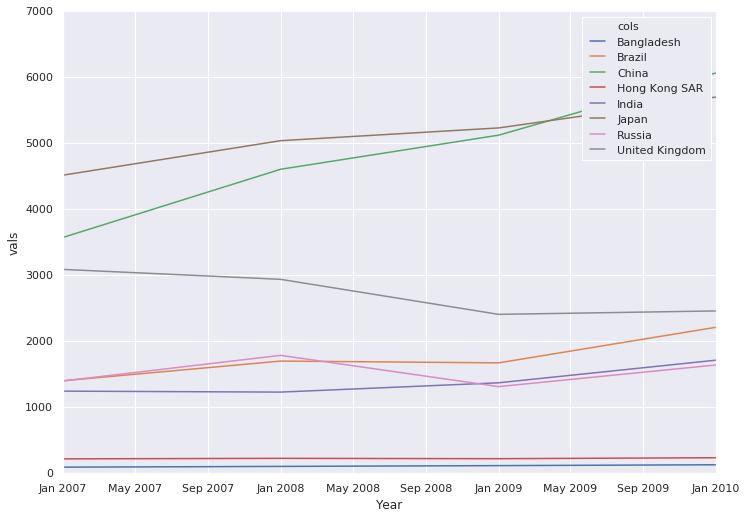

In [224]:
'''The financial crisis and all countries recorded a dip in their pattern of growth
'''

df_m4_5 = df_m4.drop(['United States'],axis=1).iloc[27:31]
df_m5 = df_m4_5.melt('Year', var_name='cols',  value_name='vals')
g = sns.lineplot(x="Year", y="vals", hue='cols', data=df_m5 )#, height=10, aspect=11.7/8.27)

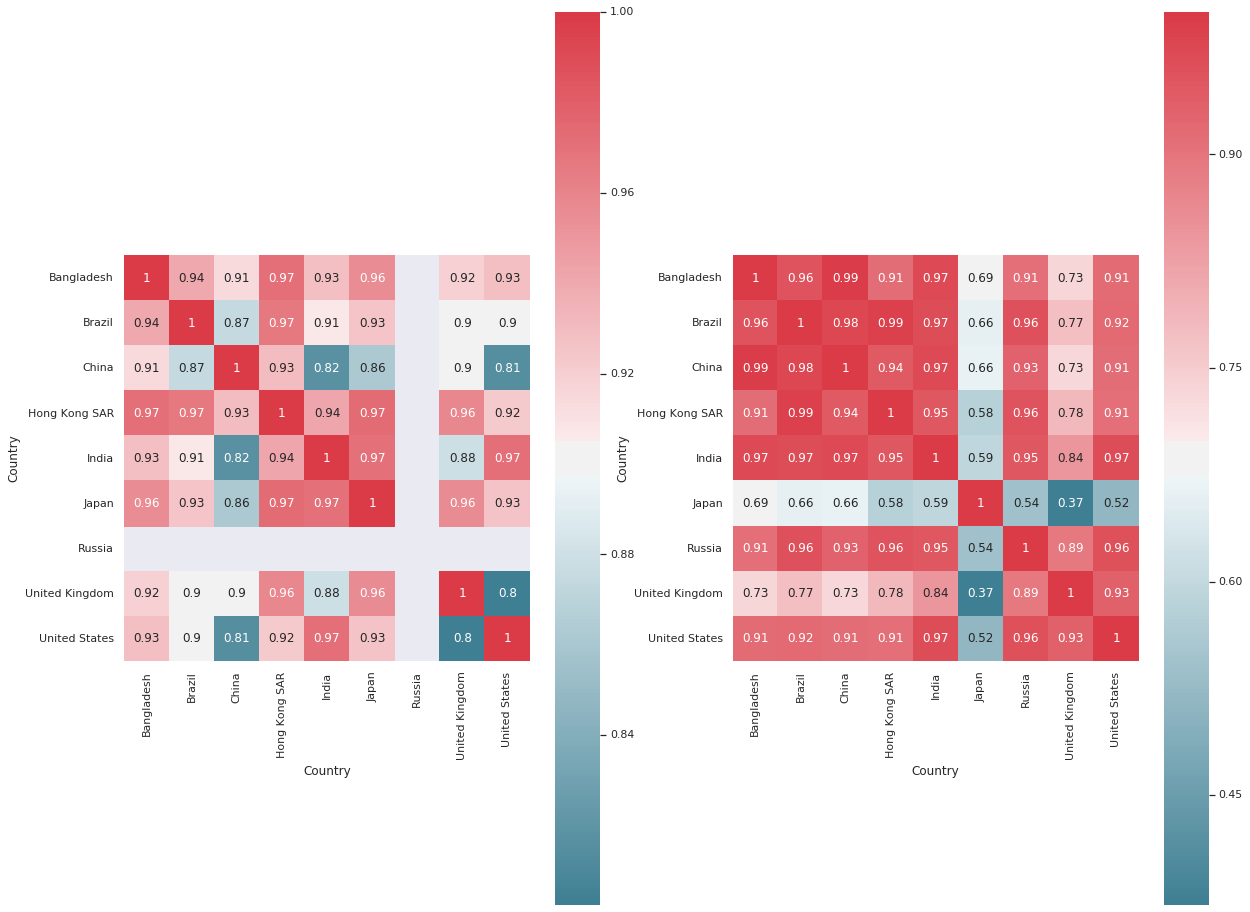

In [220]:
'''
The graph below is correlation between countries from 1980-2019

In first 10 years the correlations are in general low while in last decade it has been higher for most countries with exceptions.
Write something about Japan
'''
f, ax = plt.subplots(1,2, figsize=(20, 16))

corr = df_m4.iloc[0:10].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax[0], annot=True)

corr = df_m4.iloc[20:30].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax[1], annot=True)
fig.show()

In [253]:
i13.head()

,IndustryCode,IndustryDescription,Country,RNr,Year,vAUS1,vAUS2,vAUS3,vAUS4,vAUS5,vAUS6,vAUS7,vAUS8,vAUS9,vAUS10,vAUS11,vAUS12,vAUS13,vAUS14,vAUS15,vAUS16,vAUS17,vAUS18,vAUS19,vAUS20,vAUS21,vAUS22,vAUS23,vAUS24,vAUS25,vAUS26,vAUS27,vAUS28,vAUS29,vAUS30,vAUS31,vAUS32,vAUS33,vAUS34,vAUS35,...,vRUS58,vRUS59,vRUS60,vRUS61,vSVK57,vSVK58,vSVK59,vSVK60,vSVK61,vSVN57,vSVN58,vSVN59,vSVN60,vSVN61,vSWE57,vSWE58,vSWE59,vSWE60,vSWE61,vTUR57,vTUR58,vTUR59,vTUR60,vTUR61,vTWN57,vTWN58,vTWN59,vTWN60,vTWN61,vUSA57,vUSA58,vUSA59,vUSA60,vUSA61,vROW57,vROW58,vROW59,vROW60,vROW61,TOT
1176,A01,"Crop and animal production, hunting and relate...",IND,1,2013,3.26,0.03,0.06,0.15,6.81,0.20,0.00,0.00,0.00,0.00,0.02,0.03,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.11,0.00,0.11,0.34,0.01,0.0,0.00,0.00,0.00,...,0.0,1.26,0.0,2.12,0.61,0.0,0.00,0.0,0.0,0.74,0.0,0.00,0.0,0.01,17.14,0.0,0.00,0.0,0.00,77.59,0.0,0.64,0.16,1.42,7.37,0.07,0.00,0.00,0.0,485.58,0.0,0.0,0.00,0.08,2494.73,0.00,47.40,78.31,-0.25,369830.46
1177,A02,Forestry and logging,IND,2,2013,0.14,0.33,0.00,0.02,0.00,0.00,2.37,0.00,0.01,0.00,0.26,0.05,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,...,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.06,0.0,0.00,0.0,0.00,0.04,0.0,0.00,0.00,0.00,0.01,0.28,0.00,0.01,0.0,119.19,0.0,0.0,0.00,0.00,3.86,0.00,0.00,0.01,-0.01,28431.11
1178,A03,Fishing and aquaculture,IND,3,2013,0.04,0.00,0.04,0.00,0.67,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.24,0.0,0.00,0.00,0.00,0.00,0.00,0.05,0.84,0.00,0.0,0.00,0.00,0.00,...,0.0,0.00,0.0,1.97,0.00,0.0,0.00,0.0,0.0,0.11,0.0,0.00,0.0,0.00,0.02,0.0,0.00,0.0,0.00,0.45,0.0,0.00,0.00,0.00,14.47,0.38,0.00,0.00,0.0,1.11,0.0,0.0,0.00,0.11,1852.88,0.00,0.02,1.97,-0.01,17643.59
1179,B,Mining and quarrying,IND,4,2013,0.01,0.00,0.00,3.17,0.16,0.00,0.00,0.02,0.00,4.66,0.33,0.00,0.02,0.36,5.87,0.04,0.00,0.00,0.00,0.00,0.00,0.01,0.0,0.49,0.00,0.00,0.48,0.00,0.70,0.01,0.03,0.0,0.00,0.02,0.03,...,0.0,0.00,0.0,0.00,0.13,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.03,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,7.47,0.0,0.0,0.00,0.00,858.20,0.46,47.50,1355.96,0.04,57534.76
1180,C10-C12,"Manufacture of food products, beverages and to...",IND,5,2013,2.73,0.00,0.06,0.48,17.24,0.41,0.02,0.08,0.03,0.01,0.72,0.37,0.46,0.09,0.05,0.06,0.01,0.05,0.02,0.03,0.06,0.05,0.0,0.04,0.09,0.01,0.93,0.05,1.81,2.28,0.04,0.0,0.03,0.00,0.03,...,0.0,0.02,0.0,0.03,0.73,0.0,0.01,0.0,0.0,1.20,0.0,0.02,0.0,0.09,8.99,0.0,0.03,0.0,0.01,38.41,0.0,1.43,0.02,0.02,30.17,0.09,0.01,0.01,0.0,762.10,0.0,0.0,0.11,0.03,9409.59,0.00,81.35,3.08,-0.11,189328.72


In [0]:
mi=i0.drop(i0.iloc[:, 3:-1], inplace = False, axis = 1) 
mi['IndustryCode'] = mi['IndustryCode']+": " +mi['IndustryDescription']
mi = mi.drop(['TOT','Country','IndustryDescription'],axis=1)


mi['2014'] = i14['TOT']
mi['2013'] = i13['TOT']
mi['2012'] = i12['TOT']
mi['2011'] = i11['TOT']
mi['2010'] = i10['TOT']
mi['2009'] = i9['TOT']
mi['2008'] = i8['TOT']
mi['2007'] = i7['TOT']
mi['2006'] = i6['TOT']
mi['2005'] = i5['TOT']
mi['2004'] = i4['TOT']
mi['2003'] = i3['TOT']
mi['2002'] = i2['TOT']
mi['2001'] = i1['TOT']
mi['2000'] = i0['TOT']

mi = mi.T

mi.columns = mi.iloc[0]
mi = mi.drop(mi.index[[0]])

mi['Year'] = mi.index.values
mi['Year'] = pd.to_datetime(mi.Year, format='%Y')
mi[mi.columns[0:-1]] = mi[mi.columns[0:-1]].astype(float)

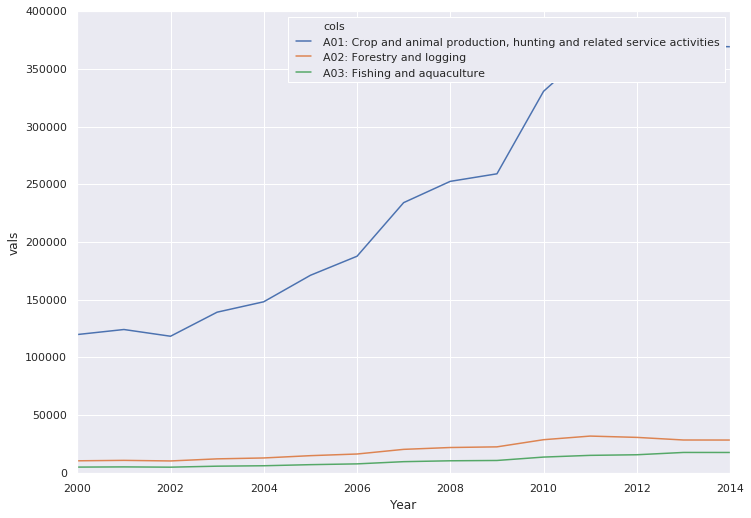

In [301]:

#mi
mi2 = mi.melt('Year', var_name='cols',  value_name='vals', value_vars=mi.filter(regex='^A'))
g = sns.lineplot(x="Year", y="vals", hue='cols', data=mi2 )#, height=10, aspect=11.7/8.27)